# Markov Graph Generation

In [16]:
import firebase_admin
from firebase_admin import credentials, firestore
from markov import get_records_by_email, get_all_records, get_record_by_id, create_nested_tables
import pandas as pd
import networkx as nx

## Instantiate DB

In [ ]:
# Fetch the service account key JSON file contents
cred = credentials.Certificate('secrets/firebase_service_credentials.json')
firebase_admin.initialize_app(cred)

In [7]:
# Reference Firestore
db = firestore.client()

# Access a collection (e.g., 'userData')
docs = db.collection('userData').stream()

In [9]:
documents = get_all_records(db)

In [10]:
documents

[{'documents': [{'createdAt': '2025-04-02T21:17:30.638Z',
    'type': 'Interaction',
    'metadata': {'name': 'Video'},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:17:30.648Z',
    'type': 'Self-Loop',
    'metadata': {'urlChange': False},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:17:30.652Z',
    'type': 'State Change',
    'metadata': {'destinationState': '/watch'},
    'url': 'https://www.youtube.com/watch?v=rYyjY-A7kE0',
    'sourceState': '/'}],
  'sessionInfo': {'email': 'jikaelgagnon@gmail.com',
   'url': 'https://www.youtube.com/'}},
 {'documents': [{'createdAt': '2025-04-02T21:19:24.165Z',
    'type': 'Interaction',
    'metadata': {'name': 'Video'},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:19:24.171Z',
    'type': 'Self-Loop',
    'metadata': {'urlChange': False},
    'url': 'https://www.youtube.com/',
    'sourceStat

## Get the data using helper functions

In [18]:
nested_tables_list = [create_nested_tables(doc) for doc in documents]

This contains nested tables of the following form:

In [20]:
nested_tables_list[0]

,email,url,documents
0,jikaelgagnon@gmail.com,https://www.youtube.com/,createdAt type ...


In [23]:
nested_tables_list[0].documents.iloc[0]

,createdAt,type,metadata,url,sourceState
0,2025-04-02T21:17:30.638Z,Interaction,{'name': 'Video'},https://www.youtube.com/,/
1,2025-04-02T21:17:30.648Z,Self-Loop,{'urlChange': False},https://www.youtube.com/,/
2,2025-04-02T21:17:30.652Z,State Change,{'destinationState': '/watch'},https://www.youtube.com/watch?v=rYyjY-A7kE0,/


In [25]:
merged_docs = pd.concat([r.documents.iloc[0] for r in nested_tables_list], ignore_index=True)

In [26]:
merged_docs

,createdAt,type,metadata,url,sourceState
0,2025-04-02T21:17:30.638Z,Interaction,{'name': 'Video'},https://www.youtube.com/,/
1,2025-04-02T21:17:30.648Z,Self-Loop,{'urlChange': False},https://www.youtube.com/,/
2,2025-04-02T21:17:30.652Z,State Change,{'destinationState': '/watch'},https://www.youtube.com/watch?v=rYyjY-A7kE0,/
3,2025-04-02T21:19:24.165Z,Interaction,{'name': 'Video'},https://www.youtube.com/,/
4,2025-04-02T21:19:24.171Z,Self-Loop,{'urlChange': False},https://www.youtube.com/,/
...,...,...,...,...,...
966,2025-04-03T17:29:11.329Z,Self-Loop,{'urlChange': True},https://www.youtube.com/shorts/NP2WUVisvwM,/shorts
967,2025-04-03T17:29:12.729Z,Self-Loop,{'urlChange': False},https://www.youtube.com/shorts/NP2WUVisvwM,/shorts
968,2025-04-03T17:29:12.841Z,Self-Loop,{'urlChange': True},https://www.youtube.com/shorts/SByYHHyalxk,/shorts
969,2025-04-03T17:29:14.286Z,Interaction,{'name': 'Side Navigation Button'},https://www.youtube.com/shorts/SByYHHyalxk,/shorts


In [24]:
G = nx.DiGraph()

In [27]:
merged_docs['createdAt'] = merged_docs['createdAt'].apply(lambda x: pd.to_datetime(x.split('GMT')[0].strip()))

In [28]:
merged_docs

,createdAt,type,metadata,url,sourceState
0,2025-04-02 21:17:30.638000+00:00,Interaction,{'name': 'Video'},https://www.youtube.com/,/
1,2025-04-02 21:17:30.648000+00:00,Self-Loop,{'urlChange': False},https://www.youtube.com/,/
2,2025-04-02 21:17:30.652000+00:00,State Change,{'destinationState': '/watch'},https://www.youtube.com/watch?v=rYyjY-A7kE0,/
3,2025-04-02 21:19:24.165000+00:00,Interaction,{'name': 'Video'},https://www.youtube.com/,/
4,2025-04-02 21:19:24.171000+00:00,Self-Loop,{'urlChange': False},https://www.youtube.com/,/
...,...,...,...,...,...
966,2025-04-03 17:29:11.329000+00:00,Self-Loop,{'urlChange': True},https://www.youtube.com/shorts/NP2WUVisvwM,/shorts
967,2025-04-03 17:29:12.729000+00:00,Self-Loop,{'urlChange': False},https://www.youtube.com/shorts/NP2WUVisvwM,/shorts
968,2025-04-03 17:29:12.841000+00:00,Self-Loop,{'urlChange': True},https://www.youtube.com/shorts/SByYHHyalxk,/shorts
969,2025-04-03 17:29:14.286000+00:00,Interaction,{'name': 'Side Navigation Button'},https://www.youtube.com/shorts/SByYHHyalxk,/shorts


In [38]:
states = merged_docs.sourceState.unique()
states

array(['/', '/shorts', '/watch', '/results', '/@homealoneagain./featured'],
      dtype=object)

In [39]:
df_deduplicated = merged_docs.loc[merged_docs['sourceState'].shift() != merged_docs['sourceState']]

# Reset the index if needed
df_deduplicated = df_deduplicated.reset_index(drop=True)

# Display or save the result
print(list(df_deduplicated.sourceState))
connections = list(df_deduplicated.sourceState)

['/', '/shorts', '/', '/watch', '/', '/watch', '/', '/watch', '/shorts', '/', '/results', '/watch', '/@homealoneagain./featured', '/', '/shorts', '/', '/watch', '/', '/watch', '/', '/watch', '/', '/watch', '/', '/shorts']


In [40]:
G.add_nodes_from(states)

In [41]:
G.nodes

NodeView(('/', '/shorts', '/watch', '/results', '/@homealoneagain./featured'))

In [42]:
edges = []
for i in range(1, len(connections)):
    edges.append((connections[i-1], connections[i]))

In [43]:
edges

[('/', '/shorts'),
 ('/shorts', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/watch'),
 ('/watch', '/shorts'),
 ('/shorts', '/'),
 ('/', '/results'),
 ('/results', '/watch'),
 ('/watch', '/@homealoneagain./featured'),
 ('/@homealoneagain./featured', '/'),
 ('/', '/shorts'),
 ('/shorts', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/watch'),
 ('/watch', '/'),
 ('/', '/shorts')]

In [44]:
G.add_edges_from(edges)

In [45]:
G.edges

OutEdgeView([('/', '/shorts'), ('/', '/watch'), ('/', '/results'), ('/shorts', '/'), ('/watch', '/'), ('/watch', '/shorts'), ('/watch', '/@homealoneagain./featured'), ('/results', '/watch'), ('/@homealoneagain./featured', '/')])

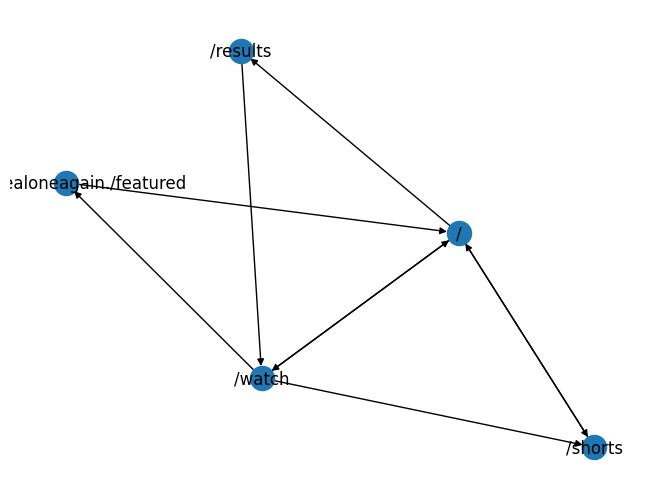

In [46]:
nx.draw(G, with_labels=True)